<a href="https://colab.research.google.com/github/sejii93/class2022Spring/blob/main/Exponential_Smoothing_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
file_path = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(file_path, 
                 parse_dates=['date'], 
                 index_col='date')
                 
df.head(12)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
1991-12-01,4.306371
1992-01-01,5.088335
1992-02-01,2.814520
1992-03-01,2.985811


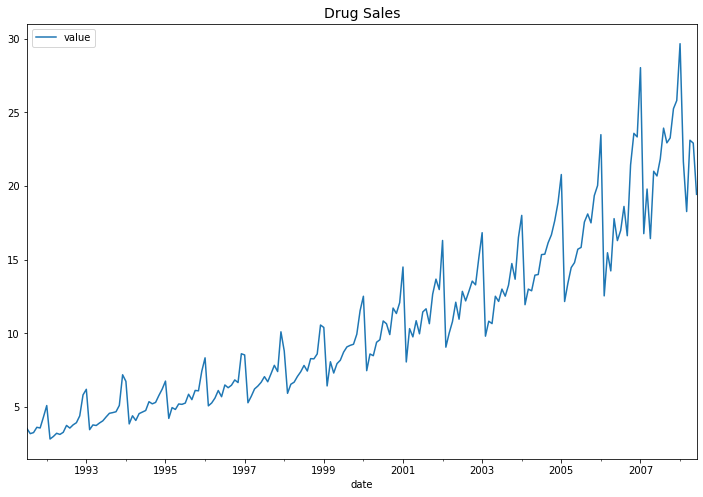

In [21]:
## time series plot
df.plot(figsize=[12, 8])
plt.title('Drug Sales', fontsize=14)
plt.show()

In [22]:
## split between the training and the test data sets. 
## The last 12 periods form the test data
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

In [23]:
## exponential smoothing in Python
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [11]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(df_train).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [24]:
# Trend
fit2 = Holt(df_train).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [25]:
# Exponential trend
fit3 = Holt(df_train,exponential=True).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [26]:
## accessing the results of SimpleExpSmoothing Model
print(fit1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  192
Model:             SimpleExpSmoothing   SSE                            692.196
Optimized:                       True   AIC                            250.216
Trend:                           None   BIC                            256.731
Seasonal:                        None   AICC                           250.430
Seasonal Periods:                None   Date:                 Mon, 30 May 2022
Box-Cox:                        False   Time:                         12:05:25
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3062827                alpha                 True
initial_level              3.4872552                

In [36]:
## accessing the results of 
print(fit2.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                  192
Model:                           Holt   SSE                            632.117
Optimized:                       True   AIC                            236.783
Trend:                       Additive   BIC                            249.813
Seasonal:                        None   AICC                           237.237
Seasonal Periods:                None   Date:                 Mon, 30 May 2022
Box-Cox:                        False   Time:                         12:10:36
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0559569                alpha                 True
smoothing_slope            0.0559568                

In [37]:
## accessing the results of 
print(fit3.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                  192
Model:                           Holt   SSE                            665.881
Optimized:                       True   AIC                            246.774
Trend:                 Multiplicative   BIC                            259.804
Seasonal:                        None   AICC                           247.228
Seasonal Periods:                None   Date:                 Mon, 30 May 2022
Box-Cox:                        False   Time:                         12:10:42
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1050946                alpha                 True
smoothing_slope            0.1050946                

In [38]:
## Holt's Winters's method for time series data with Seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [39]:
# additive model for fixed seasonal variation
fit6 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='add').fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [40]:
# multiplicative model for increasing seasonal variation
fit7 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='mul').fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [41]:
## accessing the results of 
print(fit6.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  192
Model:             ExponentialSmoothing   SSE                            111.550
Optimized:                         True   AIC                            -72.260
Trend:                         Additive   BIC                            -20.140
Seasonal:                      Additive   AICC                           -68.307
Seasonal Periods:                    12   Date:                 Mon, 30 May 2022
Box-Cox:                          False   Time:                         12:10:59
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1987572                alpha                 True
smoothing_slope          

In [42]:
## accessing the results of 
print(fit7.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  192
Model:             ExponentialSmoothing   SSE                             75.264
Optimized:                         True   AIC                           -147.808
Trend:                         Additive   BIC                            -95.688
Seasonal:                Multiplicative   AICC                          -143.854
Seasonal Periods:                    12   Date:                 Mon, 30 May 2022
Box-Cox:                          False   Time:                         12:11:15
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2588395                alpha                 True
smoothing_slope          

In [44]:
## forecasting for 12 months
forecast_1 = fit1.forecast(12)
forecast_2 = fit2.forecast(12)
forecast_3 = fit3.forecast(12)
forecast_6 = fit6.forecast(12)
forecast_7 = fit7.forecast(12)


y_test = df_test['value']

t_p = pd.DataFrame({'test': y_test, 
                    'f1': forecast_1, 
                    'f2': forecast_2, 
                    'f3': forecast_3, 
                    'f6': forecast_6, 
                    'f7': forecast_7})      
                           
                        
print(t_p)

                 test        f1         f2         f3         f6         f7
2007-07-01  21.834890  20.15245  20.409049  21.296480  20.882447  21.580175
2007-08-01  23.930204  20.15245  20.572893  21.525510  22.592362  22.164475
2007-09-01  22.930357  20.15245  20.736737  21.757002  21.389038  22.137040
2007-10-01  23.263340  20.15245  20.900582  21.990984  25.178651  24.203074
2007-11-01  25.250030  20.15245  21.064426  22.227482  26.776587  25.323182
2007-12-01  25.806090  20.15245  21.228270  22.466524  26.424420  27.549272
2008-01-01  29.665356  20.15245  21.392114  22.708136  30.468547  31.195231
2008-02-01  21.654285  20.15245  21.555958  22.952347  19.065453  18.181674
2008-03-01  18.264945  20.15245  21.719802  23.199184  21.834577  21.035078
2008-04-01  23.107677  20.15245  21.883647  23.448676  19.061434  20.086141
2008-05-01  22.912510  20.15245  22.047491  23.700851  23.452066  23.076732
2008-06-01  19.431740  20.15245  22.211335  23.955738  22.353550  22.598485


In [45]:
## UDF for counting the number of parameters in model
def num_params(model):
    n_params = 0

    for p in list(model.params.values()):
        if isinstance(p, np.ndarray):
            n_params += len(p)
            #print(p)
        elif p in [np.nan, False, None]:
            pass
        elif np.isnan(float(p)):
            pass
        else:
            n_params += 1
            #print(p)
    
    return n_params

In [46]:
num_params(fit1)
#모든 모델의 갯수를 나타내자

2

In [47]:
## number of observations in training set
T = df_train.shape[0]
print(T)

192


In [48]:
## evaluation metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [49]:
# Mean Absolute Percentage Error
def SSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sum((y_test - y_pred)**2)

def ME(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(y_test - y_pred)

def RMSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sqrt(np.mean((y_test - y_pred)**2))   
    #return np.sqrt(MSE(y_test - y_pred))

def MPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean((y_test - y_pred) / y_test) * 100

def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def AIC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + 2*k

def SBC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + k * np.log(T)

def APC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return ((T+k)/(T-k)) * sse / T

def ADJ_R2(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sst = np.sum((y_test - np.mean(y_test))**2)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    r2 = 1 - sse/sst
    return 1 - ((T - 1)/(T - k)) * (1 - r2)

In [51]:
## Combining all metrics together
def eval_all(y_test, y_pred, T, model):
    sse = SSE(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    me = ME(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    mpe = MPE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)
    aic = AIC(y_test, y_pred, T, model)
    sbc = SBC(y_test, y_pred, T, model)
    apc = APC(y_test, y_pred, T, model)
    adj_r2 = ADJ_R2(y_test, y_pred, T, model)
    
    return [sse, mse, rmse, me, mae, mpe, mape, aic, sbc, apc, adj_r2]

In [52]:
eval_all_df = pd.DataFrame(
    {'SES': eval_all(y_test, forecast_1, T, fit1), 
    "Holt's": eval_all(y_test, forecast_2, T, fit2), 
    'Exponential': eval_all(y_test, forecast_3, T, fit3), 
    'Trend_Season_Add': eval_all(y_test, forecast_6, T, fit6), 
    'Trend_Season_Mult': eval_all(y_test, forecast_7, T, fit7)}
    , index=['SSE', 'MSE', 'RMSE', 'ME', 'MAE', 'MPE', 'MAPE', 'AIC', 'SBC', 'APC', 'Adj_R2'])

In [53]:
print(eval_all_df)

               SES      Holt's  Exponential  Trend_Season_Add  \
SSE     205.629695  152.539767   124.995489         56.743368   
MSE      17.135808   12.711647    10.416291          4.728614   
RMSE      4.139542    3.565340     3.227428          2.174538   
ME        3.018502    1.860760     0.568542         -0.118976   
MAE       3.453205    2.899835     2.549482          1.863422   
MPE      11.739201    6.566169     0.854807         -0.848102   
MAPE     14.079695   12.102776    11.055995          8.538107   
AIC      17.167664  -36.173448   -74.409803       -200.039666   
SBC      23.682655  -23.143467   -61.379821       -144.662244   
APC       1.093535    0.828286     0.678721          0.352957   
Adj_R2   -1.146688   -0.609392    -0.318783          0.356848   

        Trend_Season_Mult  
SSE             48.997261  
MSE              4.083105  
RMSE             2.020669  
ME              -0.089928  
MAE              1.641246  
MPE             -0.608650  
MAPE             7.4615

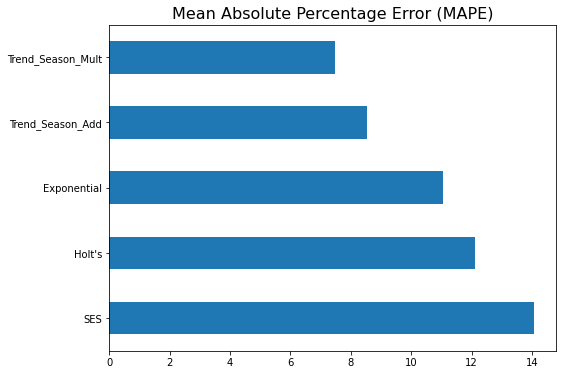

In [54]:
# horizontal bar chart
eval_all_df.loc['MAPE', :].plot(kind='barh', figsize=[8, 6])
plt.title('Mean Absolute Percentage Error (MAPE)', fontsize=16)
plt.show()

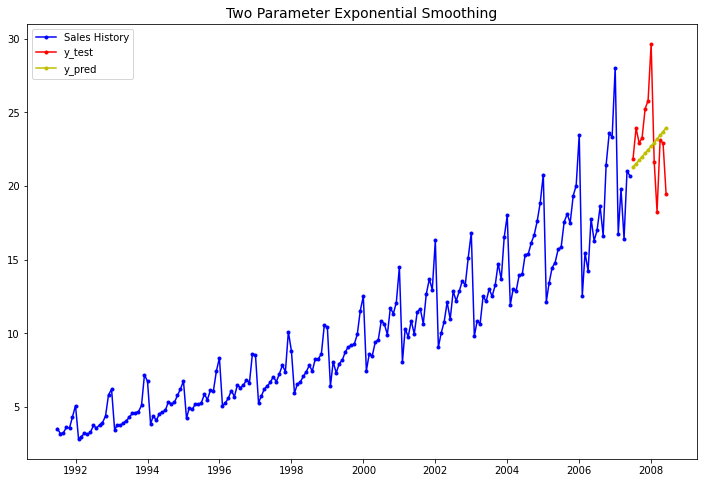

In [59]:
# 1차 선형 추세는 있고 계절성은 없는 이중 지수 평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_3, 'y.-', label='y_pred')
plt.title('Two Parameter Exponential Smoothing', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

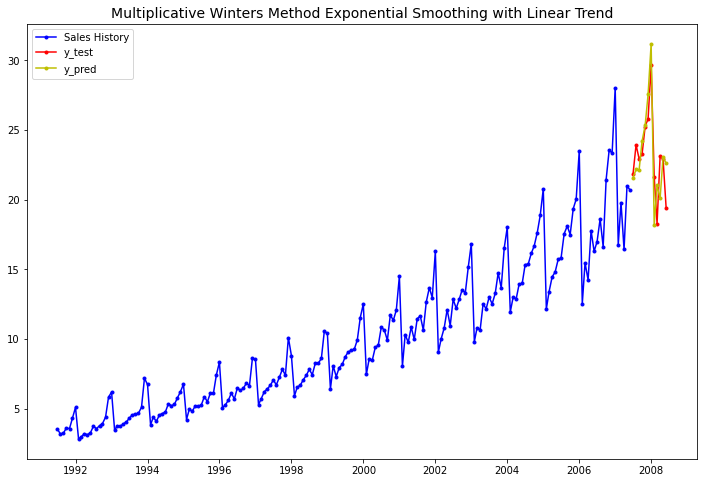

In [60]:
# 1차 선형 추세와 확산계절변동이 있는 승법 윈터스 지수평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_7, 'y.-', label='y_pred')
plt.title('Multiplicative Winters Method Exponential Smoothing with Linear Trend', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

In [61]:
#print out the training summary
print(fit7.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  192
Model:             ExponentialSmoothing   SSE                             75.264
Optimized:                         True   AIC                           -147.808
Trend:                         Additive   BIC                            -95.688
Seasonal:                Multiplicative   AICC                          -143.854
Seasonal Periods:                    12   Date:                 Mon, 30 May 2022
Box-Cox:                          False   Time:                         12:56:03
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2588395                alpha                 True
smoothing_slope          